# Data Analysis - Module 01

## Data Collection

In this phase we will collect the customer ratings data from the airline quality website called [Skytrax](https://www.airlinequality.com/airline-reviews/british-airways). We will collect data about airline ratings, seat ratings and lounge experience ratings from this website. 

In [2]:
#imports

import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests

In [4]:
#creating empty lists to collect data
reviews  = []
stars = []
date = []
country = []

In [ ]:
for i in range(1, 36):
    page = requests.get(f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/?sortby=post_date%3ADesc&pagesize=100")
    
    soup = BeautifulSoup(page.content, 'html5lib')
    
    for item in soup.find_all("div", class_="text_content"):
        reviews.append(item.text)
    
    for item in soup.find_all("div", class_ = "rating-10"):
        try:
            stars.append(item.span.text)
        except:
            stars.append("No Data")
            
    #date
    for item in soup.find_all("time"):
        date.append(item.text)
        
    #country
    for item in soup.find_all("h3"):
        country.append(item.span.next_sibling.text.strip(" ()"))

In [ ]:
#check the length of total reviews extracted
len(reviews)

In [5]:
len(country)

3462

In [6]:
len(stars)

3497

In [9]:
#Making equal length
stars = stars[:len(country)]

In [28]:
#create  a dataframe from these collected lists of data

BA_reviews = pd.DataFrame({"Reviews":reviews,"Stars": stars, "Date":date, "Country": country})

In [29]:
BA_reviews.head(10)

,Reviews,Stars,Date,Country
0,✅ Trip Verified | A really excellent journey....,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,23rd January 2023,United Kingdom
1,✅ Trip Verified | This flight was one of the ...,9,21st January 2023,United Kingdom
2,Not Verified | It seems that there is a race t...,2,19th January 2023,United States
3,Not Verified | As a Spanish born individual l...,3,19th January 2023,United Kingdom
4,✅ Trip Verified | A rather empty and quiet fl...,2,18th January 2023,United Kingdom
5,✅ Trip Verified | Easy check in and staff mem...,9,17th January 2023,United Kingdom
6,✅ Trip Verified | Being a silver flyer and bo...,9,17th January 2023,United Kingdom
7,Not Verified | I find BA incredibly tacky and...,1,16th January 2023,United Kingdom
8,✅ Trip Verified | Flew ATL to LHR 8th Jan 202...,3,9th January 2023,United Kingdom
9,Not Verified | Great thing about British Airw...,4,8th January 2023,United Kingdom


### Export the data into a csv format

In [30]:
BA_reviews.to_csv("British_Airways_reviews.csv",index=False)

## Data Cleaning

In [340]:
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')

In [3]:
BA_reviews_df=pd.read_csv("British_Airways_reviews.csv")

In [4]:
BA_reviews_df

,Reviews,Stars,Date,Country
0,✅ Trip Verified | A really excellent journey....,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,23rd January 2023,United Kingdom
1,✅ Trip Verified | This flight was one of the ...,9,21st January 2023,United Kingdom
2,Not Verified | It seems that there is a race t...,2,19th January 2023,United States
3,Not Verified | As a Spanish born individual l...,3,19th January 2023,United Kingdom
4,✅ Trip Verified | A rather empty and quiet fl...,2,18th January 2023,United Kingdom
...,...,...,...,...
3457,YYZ to LHR - July 2012 - I flew overnight in p...,7,29th August 2012,Canada
3458,LHR to HAM. Purser addresses all club passenge...,1,28th August 2012,United Kingdom
3459,My son who had worked for British Airways urge...,9,12th October 2011,United Kingdom
3460,London City-New York JFK via Shannon on A318 b...,8,11th October 2011,United States


In [5]:
BA_reviews_df["Stars"]=BA_reviews_df["Stars"].str.strip()

In [6]:
verified=BA_reviews_df["Reviews"].str.contains('✅ Trip Verified')
verified.value_counts()

False    2488
True      974
Name: Reviews, dtype: int64

In [7]:
BA_reviews_df["Verified"]=verified

In [8]:
BA_reviews_df

,Reviews,Stars,Date,Country,Verified
0,✅ Trip Verified | A really excellent journey....,5,23rd January 2023,United Kingdom,True
1,✅ Trip Verified | This flight was one of the ...,9,21st January 2023,United Kingdom,True
2,Not Verified | It seems that there is a race t...,2,19th January 2023,United States,False
3,Not Verified | As a Spanish born individual l...,3,19th January 2023,United Kingdom,False
4,✅ Trip Verified | A rather empty and quiet fl...,2,18th January 2023,United Kingdom,True
...,...,...,...,...,...
3457,YYZ to LHR - July 2012 - I flew overnight in p...,7,29th August 2012,Canada,False
3458,LHR to HAM. Purser addresses all club passenge...,1,28th August 2012,United Kingdom,False
3459,My son who had worked for British Airways urge...,9,12th October 2011,United Kingdom,False
3460,London City-New York JFK via Shannon on A318 b...,8,11th October 2011,United States,False


In [9]:
verifiedN=BA_reviews_df["Reviews"].str.contains('Not Verified')
verifiedN.value_counts()

False    3288
True      174
Name: Reviews, dtype: int64

In [10]:
for i in range(len(BA_reviews_df["Reviews"])):
    BA_reviews_df["Reviews"][i]=BA_reviews_df["Reviews"][i].replace("✅ Trip Verified | ","")
    BA_reviews_df["Reviews"][i]=BA_reviews_df["Reviews"][i].replace("Not Verified | ","")

In [11]:
BA_reviews_df

,Reviews,Stars,Date,Country,Verified
0,A really excellent journey. Lounge not overcr...,5,23rd January 2023,United Kingdom,True
1,This flight was one of the worst I have ever ...,9,21st January 2023,United Kingdom,True
2,It seems that there is a race to the bottom am...,2,19th January 2023,United States,False
3,As a Spanish born individual living in Englan...,3,19th January 2023,United Kingdom,False
4,"A rather empty and quiet flight to Tel Aviv, ...",2,18th January 2023,United Kingdom,True
...,...,...,...,...,...
3457,YYZ to LHR - July 2012 - I flew overnight in p...,7,29th August 2012,Canada,False
3458,LHR to HAM. Purser addresses all club passenge...,1,28th August 2012,United Kingdom,False
3459,My son who had worked for British Airways urge...,9,12th October 2011,United Kingdom,False
3460,London City-New York JFK via Shannon on A318 b...,8,11th October 2011,United States,False


In [12]:
#create lemmatizer object
lemmatizer = WordNetLemmatizer()
#create a set of english stopwords
stop_words = set(stopwords.words("english"))

In [31]:
reviews_BA=BA_reviews_df["Reviews"]
cleaned_reviews=[]
filtered_tokens=[]
for i in reviews_BA:
    i=re.sub('[^a-zA-Z]',' ', i).lower().split()
    i = [lemmatizer.lemmatize(word) for word in i if word not in set(stopwords.words("english"))]
    i = " ".join(i)
    cleaned_reviews.append(i)

In [33]:
len(cleaned_reviews)

3462

In [34]:
BA_reviews_df["Processed Reviews"]=cleaned_reviews

In [35]:
BA_reviews_df

,Reviews,Stars,Date,Country,Verified,Processed Reviews
0,A really excellent journey. Lounge not overcr...,5,23rd January 2023,United Kingdom,True,really excellent journey lounge overcrowded la...
1,This flight was one of the worst I have ever ...,9,21st January 2023,United Kingdom,True,flight one worst ever life wanted pamper bough...
2,It seems that there is a race to the bottom am...,2,19th January 2023,United States,False,seems race bottom amongst airline cannot even ...
3,As a Spanish born individual living in Englan...,3,19th January 2023,United Kingdom,False,spanish born individual living england using b...
4,"A rather empty and quiet flight to Tel Aviv, ...",2,18th January 2023,United Kingdom,True,rather empty quiet flight tel aviv friendly ca...
...,...,...,...,...,...,...
3457,YYZ to LHR - July 2012 - I flew overnight in p...,7,29th August 2012,Canada,False,yyz lhr july flew overnight premium economy ch...
3458,LHR to HAM. Purser addresses all club passenge...,1,28th August 2012,United Kingdom,False,lhr ham purser address club passenger name boa...
3459,My son who had worked for British Airways urge...,9,12th October 2011,United Kingdom,False,son worked british airway urged fly british ai...
3460,London City-New York JFK via Shannon on A318 b...,8,11th October 2011,United States,False,london city new york jfk via shannon really ni...


In [38]:
BA_reviews_df.Stars.unique()

array(['5', '9', '2', '3', '1', '4', '8', '6', '7', '10', 'No Data'],
      dtype=object)

In [44]:
BA_reviews_df.Stars.value_counts()

1          751
2          389
3          384
8          349
10         308
7          304
9          297
5          260
4          232
6          183
No Data      5
Name: Stars, dtype: int64

In [45]:
BA_reviews_df = BA_reviews_df[BA_reviews_df['Stars'] != 'No Data']

In [46]:
BA_reviews_df

,Reviews,Stars,Date,Country,Verified,Processed Reviews
0,A really excellent journey. Lounge not overcr...,5,23rd January 2023,United Kingdom,True,really excellent journey lounge overcrowded la...
1,This flight was one of the worst I have ever ...,9,21st January 2023,United Kingdom,True,flight one worst ever life wanted pamper bough...
2,It seems that there is a race to the bottom am...,2,19th January 2023,United States,False,seems race bottom amongst airline cannot even ...
3,As a Spanish born individual living in Englan...,3,19th January 2023,United Kingdom,False,spanish born individual living england using b...
4,"A rather empty and quiet flight to Tel Aviv, ...",2,18th January 2023,United Kingdom,True,rather empty quiet flight tel aviv friendly ca...
...,...,...,...,...,...,...
3457,YYZ to LHR - July 2012 - I flew overnight in p...,7,29th August 2012,Canada,False,yyz lhr july flew overnight premium economy ch...
3458,LHR to HAM. Purser addresses all club passenge...,1,28th August 2012,United Kingdom,False,lhr ham purser address club passenger name boa...
3459,My son who had worked for British Airways urge...,9,12th October 2011,United Kingdom,False,son worked british airway urged fly british ai...
3460,London City-New York JFK via Shannon on A318 b...,8,11th October 2011,United States,False,london city new york jfk via shannon really ni...


In [47]:
BA_reviews_df.to_csv("cleaned-BA-reviews.csv",index=False)

## Analysis

In [83]:
import matplotlib.pyplot as plt

In [49]:
BA_analysis_df=pd.read_csv("cleaned-BA-reviews.csv")
BA_analysis_df

,Reviews,Stars,Date,Country,Verified,Processed Reviews
0,A really excellent journey. Lounge not overcr...,5,23rd January 2023,United Kingdom,True,really excellent journey lounge overcrowded la...
1,This flight was one of the worst I have ever ...,9,21st January 2023,United Kingdom,True,flight one worst ever life wanted pamper bough...
2,It seems that there is a race to the bottom am...,2,19th January 2023,United States,False,seems race bottom amongst airline cannot even ...
3,As a Spanish born individual living in Englan...,3,19th January 2023,United Kingdom,False,spanish born individual living england using b...
4,"A rather empty and quiet flight to Tel Aviv, ...",2,18th January 2023,United Kingdom,True,rather empty quiet flight tel aviv friendly ca...
...,...,...,...,...,...,...
3452,YYZ to LHR - July 2012 - I flew overnight in p...,7,29th August 2012,Canada,False,yyz lhr july flew overnight premium economy ch...
3453,LHR to HAM. Purser addresses all club passenge...,1,28th August 2012,United Kingdom,False,lhr ham purser address club passenger name boa...
3454,My son who had worked for British Airways urge...,9,12th October 2011,United Kingdom,False,son worked british airway urged fly british ai...
3455,London City-New York JFK via Shannon on A318 b...,8,11th October 2011,United States,False,london city new york jfk via shannon really ni...


In [50]:
# Overall rating
BA_analysis_df.Stars.mean()

4.824992768296211

In [51]:
# Percentage of each star by making pie chart
BA_analysis_df.Stars.unique()

array([ 5,  9,  2,  3,  1,  4,  8,  6,  7, 10], dtype=int64)

In [58]:
BA_analysis_df.Stars.value_counts()

1     751
2     389
3     384
8     349
10    308
7     304
9     297
5     260
4     232
6     183
Name: Stars, dtype: int64

In [59]:
df_ratings = pd.DataFrame(BA_analysis_df["Stars"].value_counts())

In [85]:
df_ratings["Stars Given"]=df_ratings.index
# adding star with numbers
df_ratings["Stars Given"]=["{} star".format(x) for x in df_ratings["Stars Given"]]

In [86]:
df_ratings.rename(columns = {'Stars':'Number Times Given'}, inplace = True)
df_ratings=df_ratings.sort_index()
df_ratings

,Number Times Given,Stars Given
1,751,1 star
2,389,2 star
3,384,3 star
4,232,4 star
5,260,5 star
6,183,6 star
7,304,7 star
8,349,8 star
9,297,9 star
10,308,10 star


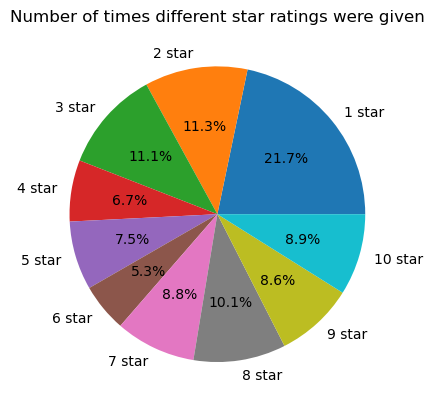

In [87]:
# create the pie chart
plt.pie(df_ratings["Number Times Given"], labels=df_ratings["Stars Given"], autopct='%1.1f%%')
plt.title('Number of times different star ratings were given')

# display the chart
plt.show()

In [89]:
# Checking people from which country are travelling
BA_analysis_df.Country.value_counts()

United Kingdom    2202
United States      362
Australia          148
Canada             107
Germany             59
                  ... 
Iceland              1
Vietnam              1
Costa Rica           1
Cayman Islands       1
Oman                 1
Name: Country, Length: 69, dtype: int64

In [94]:
country_df=pd.DataFrame(BA_analysis_df.Country.value_counts())
country_df=country_df.reset_index()

In [97]:
country_df.rename(columns = {'Country':'Number of reviews Given'}, inplace = True)
country_df.rename(columns = {'index':'Country'}, inplace = True)

In [101]:
country_df.head()

,Country,Number of reviews Given
0,United Kingdom,2202
1,United States,362
2,Australia,148
3,Canada,107
4,Germany,59


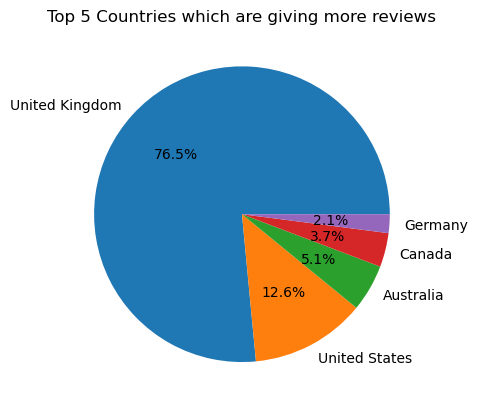

In [135]:
# create the pie chart
plt.pie(country_df.head()["Number of reviews Given"], labels=country_df.head()["Country"], autopct='%1.1f%%')
plt.title('Top 5 Countries which are giving more reviews')

# display the chart
plt.show()

### Countries Where We Are Doing Well

In [110]:
# Countries which are giving more than 7 stars
average_stars = BA_analysis_df.groupby('Country')['Stars'].mean()
average_stars_df=(pd.DataFrame(average_stars)).reset_index()
average_stars_df

,Country,Stars
0,Argentina,7.833333
1,Australia,5.439189
2,Austria,6.100000
3,Bahrain,1.000000
4,Barbados,6.000000
...,...,...
64,Ukraine,8.000000
65,United Arab Emirates,4.095238
66,United Kingdom,4.905086
67,United States,4.488950


In [112]:
average_stars_df.sort_values(by='Stars', ascending=False,inplace=True)

In [118]:
# Filter the grouped DataFrame to select only the countries with an average of 7 or more stars
filtered_average_stars = average_stars_df.query('Stars >= 7')
filtered_average_stars

,Country,Stars
51,Saint Kitts and Nevis,10.000000
35,Laos,10.000000
43,Oman,10.000000
7,Botswana,9.000000
17,Dominican Republic,9.000000
64,Ukraine,8.000000
13,Costa Rica,8.000000
0,Argentina,7.833333


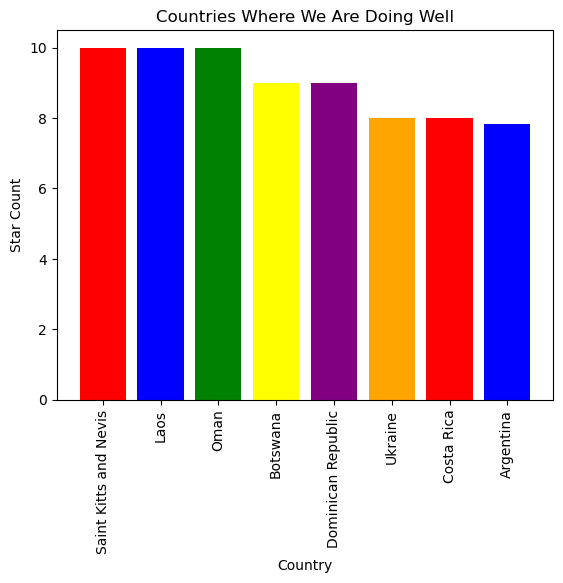

In [138]:
# create the bar chart
plt.bar(filtered_average_stars["Country"], filtered_average_stars["Stars"],color=["red", "blue", "green", "yellow", "purple", "orange"])

# add labels
plt.xlabel('Country')
plt.ylabel('Star Count')
plt.title('Countries Where We Are Doing Well')
plt.xticks(rotation=90)


# display the chart
plt.show()

### Countries Where We Are Not Doing Well

In [136]:
# Filter the grouped DataFrame to select only the countries with an average of 4 or less stars
filtered_worse_stars = average_stars_df.query('Stars <=4')
filtered_worse_stars.head()

,Country,Stars
58,Sweden,4.000000
46,Poland,4.000000
48,Qatar,4.000000
37,Malaysia,3.928571
40,New Zealand,3.909091


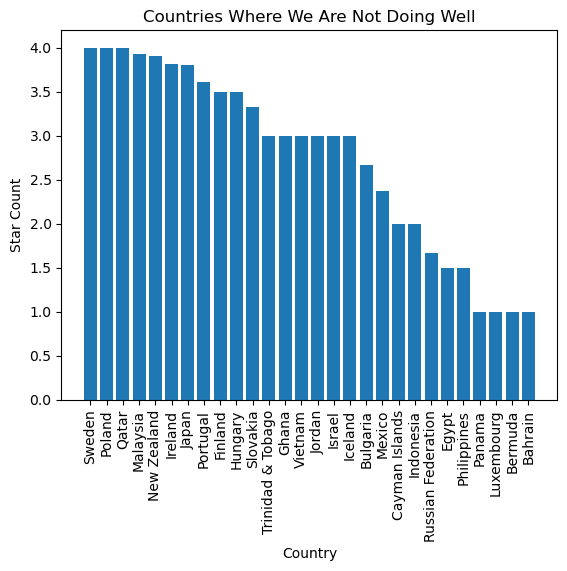

In [139]:
# create the bar chart
plt.bar(filtered_worse_stars["Country"], filtered_worse_stars["Stars"])

# add labels
plt.xlabel('Country')
plt.ylabel('Star Count')
plt.title('Countries Where We Are Not Doing Well')
plt.xticks(rotation=90)


# display the chart
plt.show()

## What People are talking about

In [151]:
from wordcloud import WordCloud, STOPWORDS

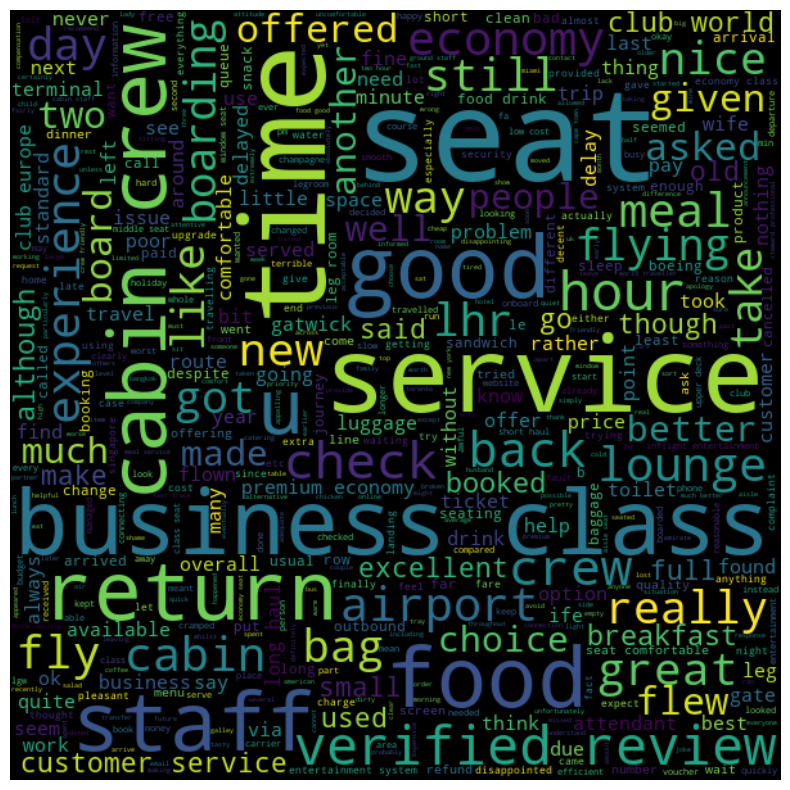

In [156]:
reviews = " ".join(BA_analysis_df["Processed Reviews"])
plt.figure(figsize=(20,10))

# setting my own stopwords
my_stopwords=(["ba","flight", "british","airway", "airline","plane", "told","also","passenger","london", "heathrow", "aircraft", "could","even", "would","verified review","get","however","first","one"])
# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500,stopwords=my_stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [170]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# download the VADER lexicon if it hasn't been downloaded already
nltk.download('vader_lexicon')

In [162]:
pos=[]
neg=[]
neu=[]
for i in BA_analysis_df["Processed Reviews"]:
    sentiment_scores = sid.polarity_scores(i)
    pos.append(sentiment_scores['pos'])
    neg.append(sentiment_scores['neg'])
    neu.append(sentiment_scores['neu'])

In [168]:
print('Negative score:', sum(neg)/len(neg))
print('Neutral score:', sum(neu)/len(neu))
print('Positive score:', sum(pos)/len(pos))

Negative score: 0.10364333236910618
Neutral score: 0.7063248481342203
Positive score: 0.19002024877061016


# Predictive Model - Module 02

In [438]:
#Libraries Import
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score

In [680]:
# reading dataset
booking_df = pd.read_csv("customer_booking.csv", encoding='ISO-8859-1')
booking_df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [681]:
#Checking the values and their counts in dataset. It Seems that it is highly imbalanced. So, to make it balance Check function 'balance'
booking_df.booking_complete.value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

In [682]:
# As data is highly imbalanced. So, We have to balance it
def balance(booking_df):
    #getting the number of 1's and 0's in dataset
    num_ones = booking_df['booking_complete'].value_counts()[1]
    num_zeros = booking_df['booking_complete'].value_counts()[0]
    
    #getting the random samples of 0's for undersampling and getting the random samples of 1's to Oversample the dataset in df_0 and df_1 respectively
    df_0 = booking_df[booking_df.booking_complete ==0].sample(n=num_ones)
    df_1 = booking_df[booking_df.booking_complete ==1].sample(n= num_zeros-num_ones , replace=True)
    
    #concatenate the two dataframee, one havng all labels 0 and other having all labels as 1.
    #In undersample, dropped the values of 0's to make the data balance
    df_undersample = pd.concat([booking_df[booking_df.booking_complete==1], df_0], ignore_index=True)
    #In oversample, duplicate the values of 1's to make the data balance
    df_oversample=pd.concat([booking_df,df_1], ignore_index=True)
    
    return df_undersample,df_oversample
    

In [683]:
#different Encoding techniques are being used for dataset to make it ready for ML Models
def processing(booking_df):
    
    #label Encoding
    encoder = LabelEncoder()

    #label Encoding to flight_day
    encoder.fit(booking_df.flight_day)
    encoded_column_day = encoder.transform(booking_df.flight_day)
    
    #label Encoding to sales_channel
    encoder.fit(booking_df.sales_channel)
    encoded_column_channel = encoder.transform(booking_df.sales_channel)
    
    
    #label Encoding to trip_type
    encoder.fit(booking_df.trip_type)
    encoded_column_trip_type = encoder.transform(booking_df.trip_type)
    
    #Applying the encoding values to original dataset
    booking_df.flight_day=encoded_column_day
    booking_df.sales_channel=encoded_column_channel
    booking_df.trip_type=encoded_column_trip_type
    
    
    #Dropped the Route column because It has 799 different values
    booking_df.drop("route",axis='columns', inplace=True)
    
   
    # Initialize the one-hot encoder
    encoder = OneHotEncoder(handle_unknown='ignore')

    # Fit and transform the column to one-hot encoded values
    one_hot_encoded_column = encoder.fit_transform(booking_df[['booking_origin']])
    
    column_names = encoder.get_feature_names(['booking_origin'])

    # Add the one-hot encoded column to the original dataframe
    encoded_df = pd.concat([booking_df, pd.DataFrame(one_hot_encoded_column.toarray(),columns=column_names)], axis=1)

    # Drop the original column
    encoded_df = encoded_df.drop(['booking_origin'], axis=1)
    
    
    # Remove the column from its current position
    booking_complete = encoded_df.pop('booking_complete')

    # Get the number of columns in the dataframe
    n = len(encoded_df.columns)

    # Insert the column at the last position
    encoded_df.insert(n, 'booking_complete', booking_complete)
    
    #Sending the data to Normalization Function to normalize
    feature_importances_df=normalization(encoded_df)
    
    return feature_importances_df
    

In [684]:
def normalization(df):
    
    # Separating the labels from other dataset
    scalar_df=df.iloc[:,:df.shape[1]-1]
    label_df=df.iloc[:,df.shape[1]-1:]
    
    
    # create an instance of StandardScaler for standard normalization
    std_scaler = StandardScaler()

    # create an instance of MinMaxScaler for MinMax scaling
    minmax_scaler = MinMaxScaler()
    
    # extract the columns to be standard normalized
    std_cols = ['purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']
    std_scaled_df = std_scaler.fit_transform(scalar_df[std_cols])

    # extract the columns to be MinMax scaled
    minmax_cols = [col for col in scalar_df.columns if col not in std_cols]
    minmax_scaled_df = minmax_scaler.fit_transform(df[minmax_cols])

    #Combinng the result of StandardScaler and MinMaxScaler
    scaled_df = pd.concat([pd.DataFrame(std_scaled_df, columns=std_cols), pd.DataFrame(minmax_scaled_df, columns=minmax_cols)], axis=1)
    
    #Sending the data to Predictive Model and getting score
    feature_importances_df=modelling_and_get_scores(scaled_df,label_df)
    return feature_importances_df

In [685]:
def modelling_and_get_scores(final_df,label_df):
    X=final_df
    y=label_df
    # Creating dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=np.random.randint(42))

    # Initializing the classifier
    base_estimator = DecisionTreeClassifier(max_depth=1)
    adaboost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50)

    # Fitting the classifier on the training data
    adaboost.fit(X_train, y_train)

    # Predicting on test data
    y_pred = adaboost.predict(X_test)
    
    
    # Get feature importances
    feature_importances = adaboost.feature_importances_

    # Create a dataframe with feature importances
    feature_importances_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})

    # Sort the dataframe by importance
    feature_importances_df = feature_importances_df.sort_values('importance', ascending=False)

    # Checking accuracy
    print("Accuracy:", accuracy_score(y_test, y_pred)*100)

    # Checking F1 score
    print("F1 Score:", f1_score(y_test, y_pred)*100)

    # Checking Precision
    print("Precision:", precision_score(y_test, y_pred)*100)
    
    return feature_importances_df

In [686]:
#calling the balance funtion
df_undersample,df_oversample=balance(booking_df)
df_undersample.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,Internet,RoundTrip,15,31,17,Mon,AKLKUL,Malaysia,0,0,0,8.83,1
1,1,Internet,RoundTrip,156,19,14,Mon,AKLKUL,Malaysia,1,0,0,8.83,1
2,1,Internet,RoundTrip,181,87,2,Tue,AKLKUL,Singapore,1,0,1,8.83,1
3,1,Mobile,RoundTrip,127,17,16,Tue,AKLKUL,Malaysia,1,0,1,8.83,1
4,1,Internet,RoundTrip,42,17,14,Tue,AKLKUL,Malaysia,0,0,0,8.83,1


In [687]:
df_oversample.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [688]:
#results for undersample
feature_importance_df=processing(df_undersample)

Accuracy: 68.54946524064172
F1 Score: 68.72715187770024
Precision: 66.62371134020619


In [689]:
#results for oversample
feature_importance_df=processing(df_oversample)

Accuracy: 70.31571520959491
F1 Score: 70.60262008733625
Precision: 69.5697074010327


## Visualization of Important Feature

In [691]:
#Removing Feature which have zero importance
feature_importance_df = feature_importance_df.drop(feature_importance_df[feature_importance_df['importance']==0].index)

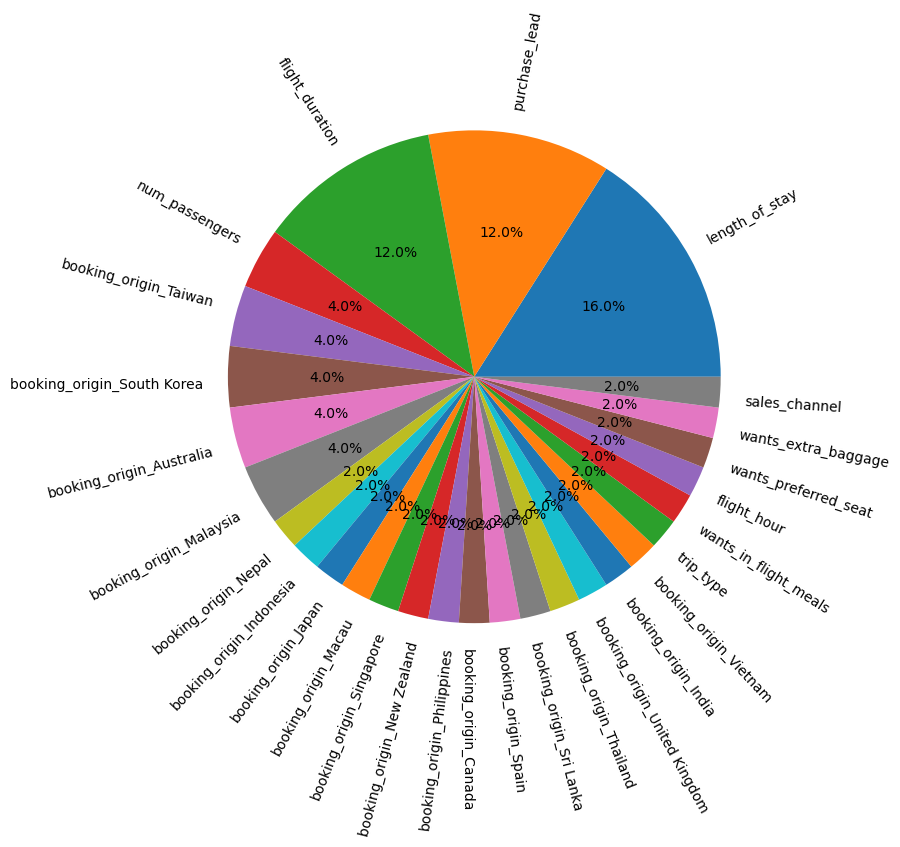

In [692]:
# Pie Chart
plt.figure(figsize=(10,8))
plt.pie(feature_importance_df['importance'], labels=feature_importance_df['feature'], autopct='%1.1f%%', rotatelabels=True, textprops={'fontsize': 10, 'wrap': True})
plt.show()

<AxesSubplot:ylabel='feature'>

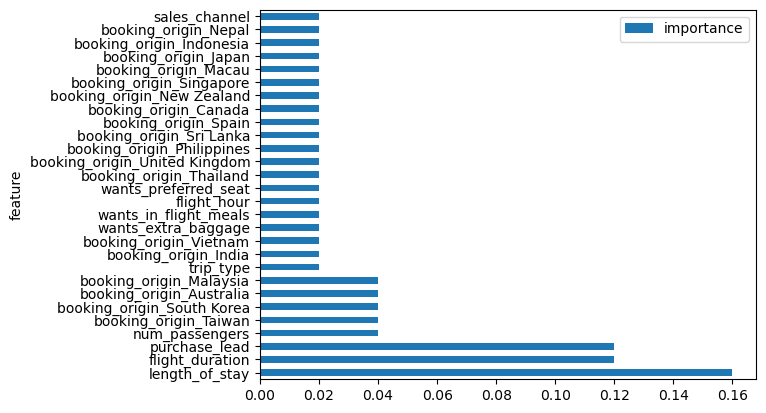

In [693]:
#BarH by sorting importance
feature_importance_df.sort_values(by='importance', ascending=False).plot(kind='barh', x='feature', y='importance')